# Task 3 –  Distribution with Multiple Columns

## Pre-requisite(start)  
  
---  



In [30]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


#checking the versions
print(sns.__version__)  # 0.9.0
print(np.__version__)  # 1.15.3
print(pd.__version__)  # 0.23.4

0.9.0
1.15.3
0.23.4


In [40]:
filename1= r'C:\Users\anshs\00ANSH_PYTHON\MyPy\000HOMEWORK\WEEK8-9 project 2\survey_results_public.csv'
filename2 = r'C:\Users\anshs\00ANSH_PYTHON\MyPy\000HOMEWORK\WEEK8-9 project 2\survey_results_schema.csv'

df_survey = pd.read_csv(filename1)
df_schema = pd.read_csv(filename2 )

# getting stats about the 2 dataframes
df_survey.info(memory_usage='deep')
print("=======================")
df_schema.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 619.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 2 columns):
Column          129 non-null object
QuestionText    129 non-null object
dtypes: object(2)
memory usage: 37.8 KB


---  
## Pre-requisite(end)  

**Geography is very important parameter to analyze distribution along a parameter, for example, we can analyze how salary is distributed world-wide.**  

## A)  
A) For this task we will plot stripplot and see the distribution of Salary and countries.  
- Plot stripplot keeping ConvertedSalary on the Y-axis and developers' countries on the X-axis. Use `df_sal_NonNa`.  
- What did you see? Which country has the highest Salary and which falls in the lowest salary segment?  


Ans: The graph for the counties and the salaries of people living in them is shown below. We changed the axis and plotted 'Countries' on y-axis and 'Converted Salaries' on X axis , because , the countrylabels were a lot and were getting cluttered. (One may say that we can rotate the labels to 90 degree, but it will still require to be either scrolled horizontally or zoomed in).  
- As we can see , it is not very much clear , but we can see that USA is the country with diverse nature in salaries. It has people covering almost the complete range of USD 0 to USD 2000K per Annum .This means we might find a developer with million dollar salary and a developer with meagre wages working at the same location in USA .  
- It is followed by United Kingdom , but it only has a density between USD 0-1000K. Only A few people have in UK have salaries above that number.  
These 2 are followed by germany, India, Italy ,.. etc , but we are not sure about the order, since the data is not sorted.  
- But one thing is for sure, there doesn't seem to be a lot of diversity in the remaining countries in therms of salary. Most of the countries have a large number of population living between 0 to USD 250 K.  
	- Consider India for example. We may have a few people having salary above 1000K, but most of the density lies near 0 to USD 300K.


In [47]:
series_converted_sal = df_survey['ConvertedSalary']
df_sal_NonNa = df_survey[series_converted_sal.isnull() == False]

series_countries = df_survey['Country']

print(len(df_sal_NonNa),type(df_sal_NonNa))
# print(df_sal_NonNa.head())
# print(df_sal_NonNa['Country'].head(),df_sal_NonNa['ConvertedSalary'].head())

# We changed the axis and plotted 'Countries' on y-axis and 
# 'Converted Salaries' on X axis , because , the countrylabels were a lot and were getting cluttered.
#  (One may say that we can rotate the labels to 90 degree, but it will still require to be either scrolled horizontally or zoomed in).

fig,ax = plt.subplots(figsize=[8,10])
ax.set(xlabel='Annual Salray(in $)', ylabel='Country',
       title='Relation between salaries of people(USD) and the country they reside in.')

sns.stripplot(y="Country", x="ConvertedSalary", data=df_sal_NonNa,size=8)



47702 <class 'pandas.core.frame.DataFrame'>


## B)  
B) The plot in section A is not very clear in order to make predictions. So we need to select some countries.  
- Lets take the top 5 countries from where the users’ belong to see their salary distribution. Again plot the stripplot using convertedsalary for the top 5 countries.  
-  Which are the countries from where most developers who took the survey belong?  
- Based on stripplot describe the distribution of Salary among these countries like which country has developers in highest range, which is in lowest range, which country it is distributed evenly.  

 
Hint – You can use the value_count() function on the Dataframe with Country column and then sort based on counts(reset_index() may be useful) and then take the top 5 values  

---  
Ans.  
- The plot for top 5 countries is displayed below.  
- Most Of the devlopers belong to United States, As we can see.   
- This graph also describes an even finer prospect of the graph created for Task 3.A . here we have only 5 countries , and as we guessed previously, it is confirmed that USA has covered the largest range of salaries, distributed (albeit sparingly) between USD 0 to USD 2,000,000 .United Kingdom seems to be the one with the most uniform salary ranged covered, having almost uniform ditribution between USD 0-1000K. Canada seems to be the one covering the smallest range out of 5, having most of the salaries distributed between USD 0-180K.


United States     20309
India             13721
Germany            6459
United Kingdom     6221
Canada             3393
Name: Country, dtype: int64


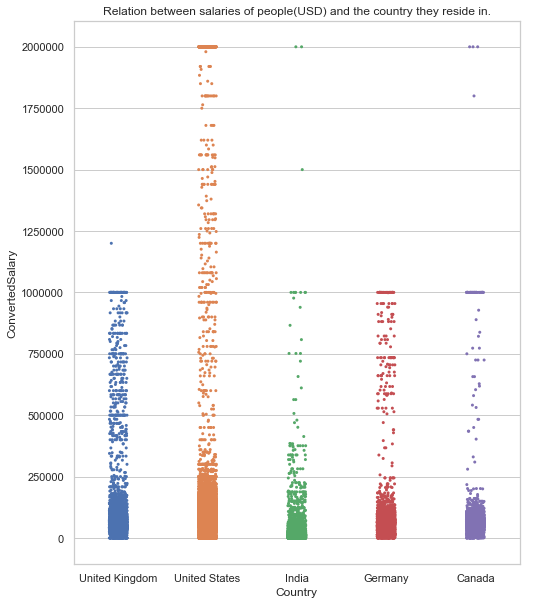

In [102]:
df_countries_freq = df_countries.value_counts()  # frequency matrix of all the countries
print(df_countries_freq[0:5])
df_survey_filtered = df_survey[df_survey['Country'].isin(df_countries_freq[0:5].index)].copy()  
                # main survey, filtered based on top5  countries from the df_countries_freq                                         
# print(df_survey_filtered.head())


fig, ax = plt.subplots(figsize=[8, 10])

ax.set(xlabel='Annual Salray(in $)', ylabel='Country',
       title='Relation between salaries of people(USD) and the country they reside in.')

sns.set(style="whitegrid", color_codes=True)
sns.stripplot(x="Country", y ="ConvertedSalary", data=df_survey_filtered,size=3)


### C)
- C) Plot the swarmplot for the top 5 countries based on no. of developers for the Salary. (refer above section B for Data).  
- Compare the result of swarmplot with the result of stripplot (in section B). What is the benefit of one over the other.  

---  
Ans.  
- The following graph below shows a swarmplot of various salaries of people in top 5 countries. It shows the density of salaries of people in different countries in a more visually appealing manner , where the thickness of graph depicts that a large number of people belong to  that perticular salary ramge.  
- It is very good alternative to stripplot when the data size is small. It also reveals that not even UK has a uniform density of salaries. Most of the developers in the UK too have salaries less than USD 125K, but still it has a somewhat small but uniformly distributed group of people having salaries between 125K to 1000K.  
- Howver the real problem comes when the dataset is large. for that case , only stripplot has shown a perticular potential to show a relation . swarmplots just blow off , when range increases by a few thousands.

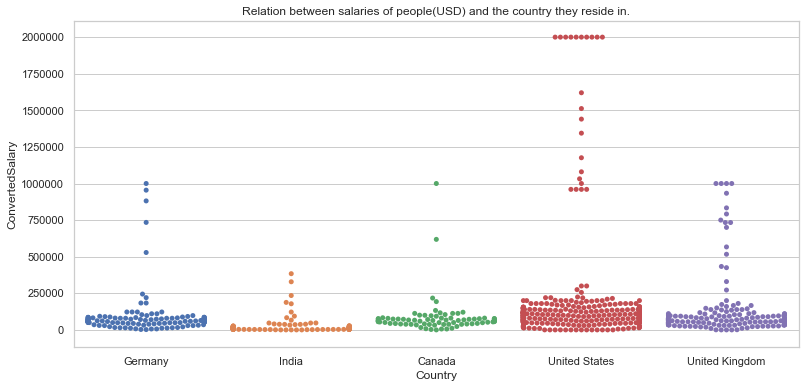

In [110]:
fig, ax = plt.subplots(figsize=[13, 6])
ax.set(xlabel='Annual Salray(in $)', ylabel='Country',
       title='Relation between salaries of people(USD) and the country they reside in.')
sns.swarmplot(x="Country", y="ConvertedSalary", data=df_survey_filtered.sample(2000))


# ----
## nothing down

### D)
D) Based on the output of part C), remove the rows containing Null values in a separate Dataframe called df_sal_NonNa

### E)

E) Use seaborn library to plot histogram for non-null values of ConvertedSalary column.  
Use different values of bins and see which gives better representation of results.  
- Plot histogram for df_sal_NonNa having bin size as 30 and 500
- Describe the results plotted in the Histogram  

---
Ans. : The following graph shows  the  distribution of people with respect to their salary.  
when the number of bins is kept low , i.e 2, it shows that around 46000 people out of 47702 have salaries less than  USD 1,000,000 . that mean less than 3% of people have salaries greater than a million dollars per month.  
On increasing the bins to 100, we get a more precise data, and find that a large population has salaries even lesser than   USD 250,000, with 13-14000 people having salaries between range of USD 0-20000.  
On increasing the binsize to 500, we get even more precize results(a bin for every USD 4000), but the graph seems to look more like a line graph than a histogram, and is uncomfortable to interpret without a large screen or smaller grid size.  
Therefore, I will prefer having 50-100 bins for the current query, since the data in consideration has a large no. of items( around 48000 ).


### F)
1. Create a new Dataframe variable called df_sal_low, to store non-null ConvertedSalary whose value is less than or equal to 250000
2. Plot histogram for df_sal_low
3. Describe the results plotted in the Histogram.  

---  
Ans, The filtered dataset and its histogram is hown below.  
When plotted , we can find out that a large number of people( around 1700) out of 45K have salaries between the first bin i.e  USD 0-2500 . this goes varingly increasing and decreasing thereafter, but overall it is just decreasing with increase in salary. Over the end, less than a 100 people are there , which have salaries greater than USD 22500 . It can also be deduced just by the looking , that roughly 50% of the Respondents earn less than a 100K per year.  
Large population of people earning less income can be termed as very bad for technological industry, as it seems the developers are being underpaid.  




### G)

Plot Salary distribution for both df_sal_NonNa and df_sal_low using a KDE Plot.  

- Describe the results of the KDE plot  

---

Answer.  

- A kde plot  plots the probability density function of population with respect to the salary in the form of a curve. Here( in the individual graphs), we plot the KDE graphs of people answering the question about salary (i.e, df_sal_NonNa) and those who answered the question AND have salary less than or equal to USD 250000.  
- The 1st graph show that frequency of popultion that the frequency of population is maximum at the very start of the graph, i.e people having salary between 0 and USD 250K . The rugged plot also shows that very few numbers might exist between the remaining range. However there is a small rise seen at USD 1000K and USD 2000K showing that there exist a few millionares and multi millionares among the respondants too.  
- The 2nd graph show the frequency of people having salary less than USD 250,000. Here also there seeems to be a large number of population having salary between USD 0-25000. After USD 25K, the density starts to decrease , but there is a slight increase in wave at USD 50-60,000 , indicating that second most common salary range in technical industry is USD 50-60,000.  After this range , the desity reduces gradually tll USD 200K , and is reduced to a density of  0.000001 at USD 250K.